World Wide Products Inc.

Overview: Data set used for Analysis https://www.kaggle.com/felixzhao/productdemandforecasting

In [844]:
#Import Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Loaded the dataframe into Pandas. Coverted the data type for 'Date' coloumn from string to Date and set it as an index

In [845]:
#Load the dataframe
data = pd.read_csv ('Historical Product Demand.csv',parse_dates=["Date"], index_col="Date")
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [846]:
#Describe dataframe
data.describe()

,Order_Demand
count,1.038106e+06
mean,4.936488e+03
std,2.902462e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [847]:
#Describe the datatype of columns in the dataframe
data.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Order_Demand         int64
dtype: object

Data Cleaning: Removed all the Null values from the data set to clean the dataframe

In [848]:
#Drop rows will null dates in the dataframe
data=data.dropna()
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


Data Analysis: Noted that that there were 427 unique items in Warehouse A, 244 unique items in Warehouse C, 1625 itemns in Warehouse J and 553 unique items in Warehouse S. Created new data farmes by selecting products 'Product_0082' and 'Product_0002' and observed the order demands over the months and years.

In [849]:
#Number of unique products in each warehouse
product_count=data.groupby(['Warehouse'])['Product_Code'].nunique()
product_count.columns=['Warehouse','Products']
product_count

Warehouse
Whse_A     427
Whse_C     244
Whse_J    1625
Whse_S     553
Name: Product_Code, dtype: int64

In [850]:
#create a subset of dataframe for product_1
option=['Product_0082']
prod1= data[data['Product_Code'].isin(option)]
prod1.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-04-01,Product_0082,Whse_J,Category_019,2000
2012-08-01,Product_0082,Whse_J,Category_019,1000
2012-07-10,Product_0082,Whse_J,Category_019,1000
2012-09-14,Product_0082,Whse_J,Category_019,1000
2012-11-06,Product_0082,Whse_J,Category_019,2000


In [851]:
#Verify the index for prod1
prod1.index

DatetimeIndex(['2012-04-01', '2012-08-01', '2012-07-10', '2012-09-14',
               '2012-11-06', '2012-02-01', '2012-01-13', '2012-03-16',
               '2012-03-27', '2012-05-07',
               ...
               '2016-04-18', '2016-04-29', '2016-06-30', '2016-09-30',
               '2016-11-29', '2016-02-18', '2016-03-07', '2016-10-27',
               '2016-09-09', '2016-11-30'],
              dtype='datetime64[ns]', name='Date', length=578, freq=None)

In [852]:
#Retrieve prod1 orders for Jan 2016
prod1["2016-01"]

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-01-14,Product_0082,Whse_S,Category_019,20000
2016-01-12,Product_0082,Whse_J,Category_019,50000
2016-01-28,Product_0082,Whse_J,Category_019,20000
2016-01-12,Product_0082,Whse_J,Category_019,30000
2016-01-15,Product_0082,Whse_J,Category_019,40000
2016-01-22,Product_0082,Whse_J,Category_019,10000


In [853]:
#Monthly average orders for product 1
prod1.resample('M').mean().head()


,Order_Demand
Date,
2011-12-31,18000.000000
2012-01-31,16937.500000
2012-02-29,17600.000000
2012-03-31,16909.090909
2012-04-30,19600.000000


Calculated a monthly mean of the product demand with product id '82' and plotted a graph of the order demand. Noted that the order demand has increased over the months.

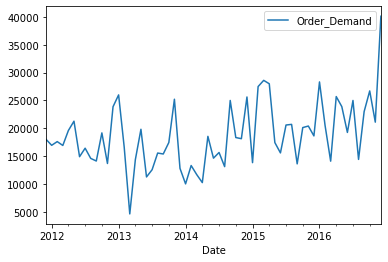

In [854]:
%matplotlib inline
prod1.resample('M').mean().plot()

In [855]:
#Yearly average for product 1
prod1.resample('Y').mean()

,Order_Demand
Date,
2011-12-31,18000.000000
2012-12-31,17046.357616
2013-12-31,15482.758621
2014-12-31,15758.064516
2015-12-31,20410.526316
2016-12-31,23175.824176


Graph showing increase in order demand for product_0082 over the years

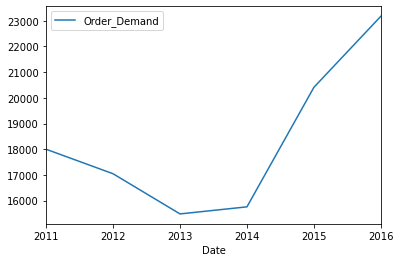

In [856]:
%matplotlib inline
prod1.resample('Y').mean().plot() 

Date
2011-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2012-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2013-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Order_Demand, dtype: object

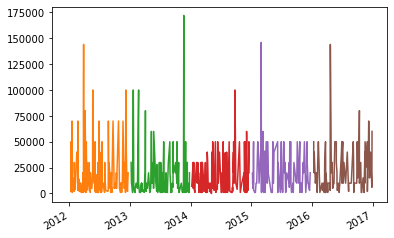

In [857]:
#Total order demands for product 1 for each year
%matplotlib inline
prod1.Order_Demand.resample('Y').plot() 

In [858]:
#create a subset of dataframe for product_2
option=['Product_0002']
prod2= data[data['Product_Code'].isin(option)]
prod2.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-03-01,Product_0002,Whse_S,Category_005,50000
2012-05-02,Product_0002,Whse_S,Category_005,50000
2012-07-03,Product_0002,Whse_S,Category_005,30000
2012-09-05,Product_0002,Whse_S,Category_005,10000
2012-11-08,Product_0002,Whse_S,Category_005,30000


Monthly average graph for product_0002 denotes that the demand for product 2 was highest towards the latter half of 2015 and early 2016.

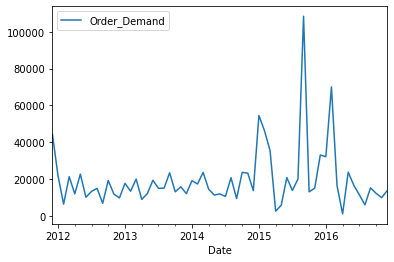

In [859]:
#Plot mean of monthly demand for data
%matplotlib inline
prod2.resample('M').mean().plot()

Yearly demand of graph of for product 2 denotes that there is a steep increase in demand from 2014 to 2015 and a steep decreases from 2015 towards the beginning of 2016

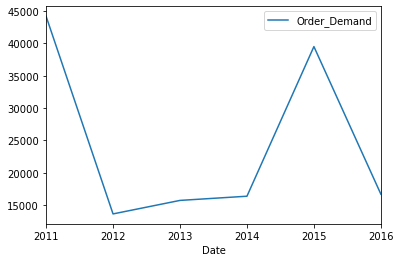

In [860]:
#Plot mean of Yearly demand for data
%matplotlib inline
prod2.resample('Y').mean().plot()

Date
2011-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2012-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2013-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Order_Demand, dtype: object

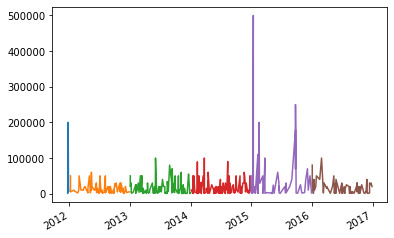

In [861]:
%matplotlib inline
prod2.Order_Demand.resample('Y').plot() 

In [862]:
#Print shape of data
print ('Shape of data',prod1.shape)


Shape of data (578, 4)


Check for stationary. Noted that the data is stationary.

In [863]:

from statsmodels.tsa.stattools import adfuller

def ad_test (dataset):
 dftest= adfuller(dataset, autolag ='AIC')
 print("ADF : ",dftest[0])
 print("P-Value : ",dftest[1])
 print("Number of lags : ",dftest[2])
 print ("Number of observations : ",dftest[3])
 print("Critical Values : ")
 for key, val in dftest[4].items():
    print("\t",key, ":",val)

In [864]:
#Display the P-Value, which gives the probability
ad_test(prod1['Order_Demand'])

ADF :  -7.1472224779582945
P-Value :  3.209350766810398e-10
Number of lags :  5
Number of observations :  572
Critical Values : 
	 1% : -3.441834071558759
	 5% : -2.8666061267054626
	 10% : -2.569468095872659


Noted that the P-value id very small implying the data set id stationary and a prediction can be made using models. Compared two prediction models- Regression and ARIMA model to make future predictions of data.

In [865]:
#Predicting using a Regression model
df = pd.read_csv ('Historical Product Demand.csv')
option=['Product_0082']
prod_new= data[data['Product_Code'].isin(option)]
prod_new.head()
O= prod2['Order_Demand']
D=O.reset_index(drop=True)
D

0      50000
1      50000
2      30000
3      10000
4      30000
       ...  
444    25000
445    25000
446    25000
447    25000
448     9000
Name: Order_Demand, Length: 449, dtype: int64

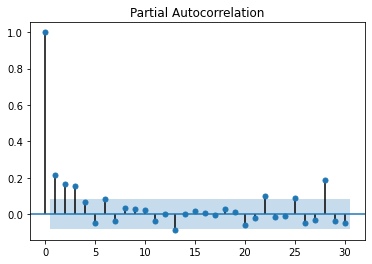

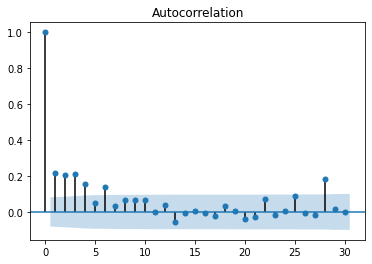

In [866]:
# Check the past values; x=time lags, y=correlation
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf= plot_pacf(prod_new['Order_Demand'],lags=30)
acf= plot_acf(prod_new['Order_Demand'],lags=30)

In [867]:
#Consider corelation upto 5
#Split dataset into train and test
train= D[:len(O)-5]
test=D[len(O)-5:]

In [868]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=10).fit()

In [869]:
#p-value is small
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                  444
Model:                    AutoReg(10)   Log Likelihood               -5141.581
Method:               Conditional MLE   S.D. of innovations          33793.421
Date:                Mon, 12 Oct 2020   AIC                             20.911
Time:                        19:22:50   BIC                             21.024
Sample:                            10   HQIC                            20.956
                                  444                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         9443.1174   2475.447      3.815      0.000    4591.331    1.43e+04
Order_Demand.L1      0.0812      0.048      1.691      0.091      -0.013       0.175
Order_Demand.L2      0.0725      0.048      1.506      0.132      -0.022       0.167
Order_Demand.L3      0.2420      0.049      4.981      0.000       0.147       0.337
Order_Demand.L4      0.0051      0.050      0.102      0.919      -0.093       0.103
Order_Demand.L5     -0.0096      0.050     -0.194      0.846      -0.107       0.088
Order_Demand.L6      0.0633      0.050      1.271      0.204      -0.034       0.161
Order_Demand.L7      0.0482      0.050      0.965      0.334      -0.050       0.146
Order_Demand.L8      0.0223      0.049      0.459      0.646      -0.073       0.117
Order_Demand.L9     -0.0301      0.048     -0.621      0.535      -0.125       0.065
Order_Demand.L10     0.0168      0.048      0.349      0.727      -0.078       0.111
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.4191           -0.0000j            1.4191           -0.5000
AR.2            -1.0348           -0.9356j            1.3951           -0.3830
AR.3            -1.0348           +0.9356j            1.3951            0.3830
AR.4            -0.3954           -1.2642j            1.3246           -0.2982
AR.5            -0.3954           +1.2642j            1.3246            0.2982
AR.6             1.1963           -0.0000j            1.1963           -0.0000
AR.7             0.8827           -1.3225j            1.5900           -0.1563
AR.8             0.8827           +1.3225j            1.5900            0.1563
AR.9             1.5525           -1.2823j            2.0136           -0.1099
AR.10            1.5525           +1.2823j            2.0136            0.1099
------------------------------------------------------------------------------
"""

In [870]:
#Make preditions on dataset
pred= model.predict(start=len(train),end=len(O)-1,dynamic=False)

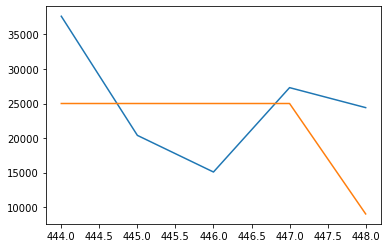

In [871]:
#plot the predictions
plt.plot(pred)
plt.plot(test)

In [872]:
#Find the order for ARIMA model
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [873]:
#Calling the auto_arima function
fit = auto_arima(prod1['Order_Demand'],trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13166.198, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13215.585, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13189.939, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13196.990, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13504.129, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13173.645, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13173.712, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13167.288, Time=2.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=13167.090, Time=1.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13180.902, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=13167.792, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13166.223, Time=0.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=13185.661, Time=0.55 sec

Best model:  ARIMA(2,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  578
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -6577.099
Date:                Mon, 12 Oct 2020   AIC                          13166.198
Time:                        19:23:02   BIC                          13192.355
Sample:                             0   HQIC                         13176.398
                                - 578                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9224.9168   2841.895      3.246      0.001    3654.905    1.48e+04
ar.L1         -0.2145      0.092     -2.320      0.020      -0.396      -0.033
ar.L2          0.7157      0.084      8.512      0.000       0.551       0.881
ma.L1          0.3913      0.110      3.557      0.000       0.176       0.607
ma.L2         -0.5102      0.099     -5.131      0.000      -0.705      -0.315
sigma2      4.551e+08      0.320   1.42e+09      0.000    4.55e+08    4.55e+08
===================================================================================
Ljung-Box (Q):                       74.92   Jarque-Bera (JB):              5186.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             2.90
Prob(H) (two-sided):                  0.53   Kurtosis:                        16.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.41e+23. Standard errors may be unstable.
"""

Intercepted the model using auto ARIMA and a score. Predicted the best model with minimum AIC score as (2,0,2)

In [874]:
#Prediction using ARIMA model
from statsmodels.tsa.arima_model import ARIMA

Divide data into Training and Test for testing

Last 25 values reserved for testing and rest of the data used for training

In [885]:
print(prod1.shape)
train = prod1.iloc[:-25]
test = prod1.iloc [-25:]
print(train.shape,test.shape)

(578, 4)
(553, 4) (25, 4)


Train the model using Best model predicted earlier (2,0,2)

In [876]:
model = ARIMA(train['Order_Demand'], order=(2,0,2))
model= model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                  553
Model:                     ARMA(2, 2)   Log Likelihood               -6298.220
Method:                       css-mle   S.D. of innovations          21377.263
Date:                Mon, 12 Oct 2020   AIC                          12608.441
Time:                        19:23:03   BIC                          12634.333
Sample:                             0   HQIC                         12618.557
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.813e+04   1810.095     10.016      0.000    1.46e+04    2.17e+04
ar.L1.Order_Demand     1.0305      0.406      2.537      0.011       0.234       1.827
ar.L2.Order_Demand    -0.1948      0.341     -0.572      0.567      -0.862       0.473
ma.L1.Order_Demand    -0.8921      0.400     -2.230      0.026      -1.676      -0.108
ma.L2.Order_Demand     0.2205      0.269      0.820      0.412      -0.307       0.748
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2800           +0.0000j            1.2800            0.0000
AR.2            4.0115           +0.0000j            4.0115            0.0000
MA.1            2.0227           -0.6661j            2.1295           -0.0506
MA.2            2.0227           +0.6661j            2.1295            0.0506
-----------------------------------------------------------------------------
"""

Specifying the start and end points on the data set to make predictions. Starting from the test data upto the train data

In [877]:
s=len(train)
e = len(train)+len(test)-1
pred= model.predict(start=s, end=e,typ='levels')
print (pred)

553    14609.932693
554    14913.871523
555    15501.245617
556    16047.360965
557    16495.758674
558    16851.490426
559    17130.757542
560    17349.272180
561    17520.070998
562    17653.528733
563    17757.797985
564    17839.259777
565    17902.902236
566    17952.623073
567    17991.467563
568    18021.814878
569    18045.523759
570    18064.046355
571    18078.517158
572    18089.822491
573    18098.654799
574    18105.555051
575    18110.945882
576    18115.157475
577    18118.447789
dtype: float64


Noted that the index values is not a date value. Setting index value as date from the dataframe

In [878]:
pred.index=prod1.index[s:e+1]
print(pred)

Date
2016-08-09    14609.932693
2016-09-13    14913.871523
2016-10-13    15501.245617
2016-11-11    16047.360965
2016-01-22    16495.758674
2016-05-13    16851.490426
2016-05-31    17130.757542
2016-06-17    17349.272180
2016-09-13    17520.070998
2016-11-15    17653.528733
2016-12-27    17757.797985
2016-08-18    17839.259777
2016-05-05    17902.902236
2016-11-30    17952.623073
2016-12-28    17991.467563
2016-04-18    18021.814878
2016-04-29    18045.523759
2016-06-30    18064.046355
2016-09-30    18078.517158
2016-11-29    18089.822491
2016-02-18    18098.654799
2016-03-07    18105.555051
2016-10-27    18110.945882
2016-09-09    18115.157475
2016-11-30    18118.447789
dtype: float64


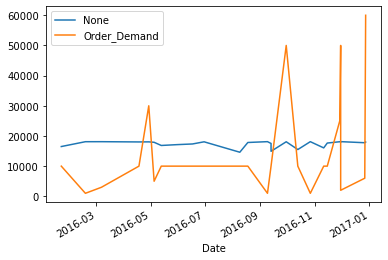

In [879]:
#Plotting the prediction versus the actual model
pred.plot(legend=True)
test['Order_Demand'].plot(legend =True)

Predicted Order values for future 30 days using the ARIMA model.

In [886]:
#Predict future values
model2 = ARIMA(prod1['Order_Demand'], order=(2,0,2))
model2= model2.fit()
prod1.tail()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-02-18,Product_0082,Whse_J,Category_019,1000
2016-03-07,Product_0082,Whse_J,Category_019,3000
2016-10-27,Product_0082,Whse_J,Category_019,1000
2016-09-09,Product_0082,Whse_J,Category_019,1000
2016-11-30,Product_0082,Whse_J,Category_019,2000


In [887]:
#Predicting for next 30 days
index_future = pd.date_range(start='2016-11-30',end= '2016-12-30')
print(index_future)

DatetimeIndex(['2016-11-30', '2016-12-01', '2016-12-02', '2016-12-03',
               '2016-12-04', '2016-12-05', '2016-12-06', '2016-12-07',
               '2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11',
               '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15',
               '2016-12-16', '2016-12-17', '2016-12-18', '2016-12-19',
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', freq='D')


In [888]:
pred= model2.predict(start=len(prod1),end=len(prod1)+30,typ='levels').rename('Predictions')
print(pred)

578    10289.057682
579    11217.019422
580    12533.655231
581    13723.155364
582    14689.154013
583    15446.330086
584    16032.184833
585    16483.267814
586    16829.932282
587    17096.157681
588    17300.552188
589    17457.459272
590    17577.906828
591    17670.365264
592    17741.338145
593    17795.818171
594    17837.637954
595    17869.739511
596    17894.381193
597    17913.296552
598    17927.816292
599    17938.961881
600    17947.517418
601    17954.084788
602    17959.126009
603    17962.995733
604    17965.966196
605    17968.246372
606    17969.996673
607    17971.340232
608    17972.371570
Name: Predictions, dtype: float64


In [889]:
#Set date as index value for predictions
pred.index= index_future
print(pred)

2016-11-30    10289.057682
2016-12-01    11217.019422
2016-12-02    12533.655231
2016-12-03    13723.155364
2016-12-04    14689.154013
2016-12-05    15446.330086
2016-12-06    16032.184833
2016-12-07    16483.267814
2016-12-08    16829.932282
2016-12-09    17096.157681
2016-12-10    17300.552188
2016-12-11    17457.459272
2016-12-12    17577.906828
2016-12-13    17670.365264
2016-12-14    17741.338145
2016-12-15    17795.818171
2016-12-16    17837.637954
2016-12-17    17869.739511
2016-12-18    17894.381193
2016-12-19    17913.296552
2016-12-20    17927.816292
2016-12-21    17938.961881
2016-12-22    17947.517418
2016-12-23    17954.084788
2016-12-24    17959.126009
2016-12-25    17962.995733
2016-12-26    17965.966196
2016-12-27    17968.246372
2016-12-28    17969.996673
2016-12-29    17971.340232
2016-12-30    17972.371570
Freq: D, Name: Predictions, dtype: float64


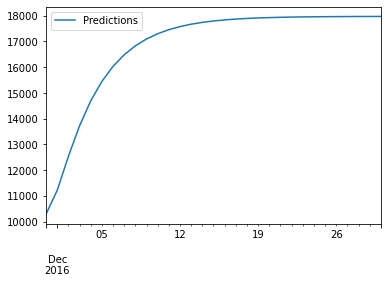

In [890]:
#plot future predictions
pred.plot(legend=True)